In [1]:
import re
with open('Harry Potter.txt', 'r', encoding='utf-8') as f: #открываем файл для чтения
    potter = f.read()

no_punct = re.sub(r'[^\w\s]', '', potter) #убираем пунктуацию
no_punct = no_punct.split() #разбиваем по словам
no_punct2 = [w.lower() for w in no_punct] #убираем заглавные буквы

In [2]:
from nltk import WordNetLemmatizer, pos_tag
from nltk.tokenize import word_tokenize

potter2 = " ".join(no_punct2) #объединяем в строку
potter3 = word_tokenize(potter2) #токенизируем слова

wnl = WordNetLemmatizer()
potter4 = [wnl.lemmatize(a, pos='v') for a in potter3] #лемматизируем текст через тегсет

with open('a.txt', 'w', encoding='utf-8') as f: #записываем лемматизированный текст в новый файл
    for d in potter4:
        f.write(d)
        f.write(' ')


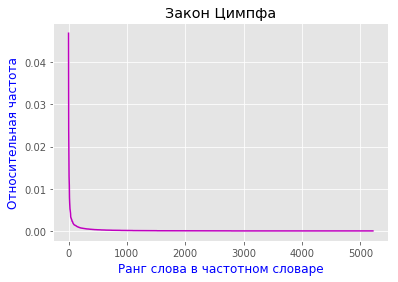

In [5]:
from collections import Counter #импортируем Counter

chastota = Counter(potter4) #считаем частотность слов
count_potter = len(potter4) #считаем количество слов
ipm1 = {w: chastota[w]/count_potter for w in chastota} #считаем относительную частотность (ipm)
ipm2 = sorted(ipm1.items(), key=lambda item: item[1], reverse = True) #сортируем словарь 

import matplotlib #импортирует matplot
import matplotlib.pyplot as plt
from matplotlib import style  
style.use('ggplot') #выбираем ggplot

X = [i for i in range(0,len(ipm2))] #выводим порядковый номер по оси X
Y = [c[1] for c in ipm2] #выводим относительную частоту по оси Y
         
plt.plot(X,Y, color='m'), #рисуем график, соединяем точки с координатами 
plt.title("Закон Цимпфа")
plt.xlabel("Ранг слова в частотном словаре", color='b')
plt.ylabel("Относительная частота", color='b')
plt.show()

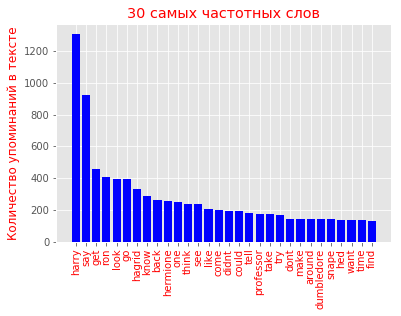

In [6]:
from nltk.corpus import stopwords #импортируем стопслова

stopariki = stopwords.words('english')
cleanlist = [q for q in potter4 if q not in stopariki]

chastota2 = Counter(cleanlist) #считаем частотность слов без стопслов
ipm_clean = {w: chastota2[w] for w in chastota2} #считаем, сколько раз слово встречается в тексте
ipm_clean = sorted(ipm_clean.items(), key=lambda item: item[1], reverse = True) #сортируем словарь 

X = [i for i in range(0,30)] #выводим на график первые 30 слов
Y = [c[1] for c in ipm_clean][:30] 
W = [c[0] for c in ipm_clean][:30] 

plt.bar(X, Y, color='b') #подписываем график
plt.xticks(X, W, color='r', rotation=90)
plt.title("30 самых частотных слов", color='r')
plt.ylabel("Количество упоминаний в тексте", color='r')
plt.show()